<font size="6"><b>HOW PRECISE IS OPENCV'S NUMBER PLATE DETECTION?</b></font>

In [18]:
from IPython import display

In [ ]:
import cv2
import pytesseract
import os

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

plate_cascade = cv2.CascadeClassifier(r"E:\pycharm\OpenCVPython\PythonFinalProjectFinal\haarcascade_russian_plate_number.xml")
image_folder = r"E:\pycharm\OpenCVPython\PythonFinalProjectFinal\input_images"


image_files = [file for file in os.listdir(image_folder) if file.endswith((".jpg", ".jpeg", ".png"))]

for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        img = cv2.imread(image_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plates = plate_cascade.detectMultiScale(img_gray, 1.1, 4)

        for (x, y, w, h) in plates:
            plate_roi = img[y:y + h, x:x + w]
            plate_text = pytesseract.image_to_string(plate_roi, config='--psm 7')


            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, plate_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        cv2.imshow("Result", img)
        cv2.waitKey(0)

cv2.destroyAllWindows()

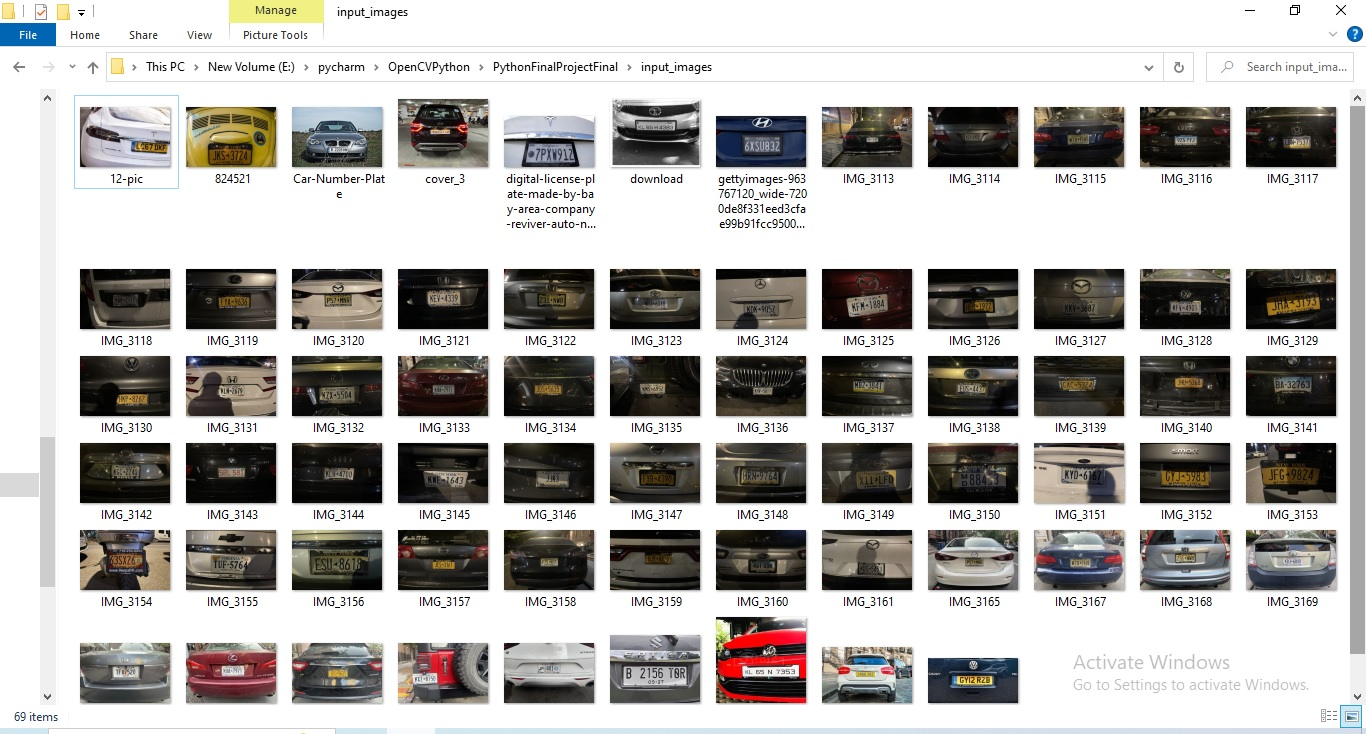

In [20]:
display.Image("inputImagesJupyter.jpg")

CATEGORIZING NUMBER PLATES

• TP: A predicted bounding box that overlaps significantly with a ground truth annotation (above a certain threshold) and correctly identifies a number plate.

<img src="TP Example.jpg" alt="Alternative text" />

• TN: A predicted bounding box that does not overlap with any ground truth annotation and correctly identifies a non-number plate region.

*My program is primarily focused on detecting and highlighting number plates, so TN wasn't applicable to it. Its main objective is to find and mark license plates accurately.*

• FP: A predicted bounding box that does not overlap with any ground truth annotation but incorrectly identifies a non-number plate region as a number plate.

<img src="FP Example.jpg" alt="Alternative text" />

• FN: A ground truth annotation that does not have a corresponding predicted bounding box, indicating a missed detection.

<img src="FN Example.jpg" alt="Alternative text" />

In [3]:
import matplotlib.pyplot as plt

In [4]:
fn_count = 21
fp_count = 18
tp_count = 30

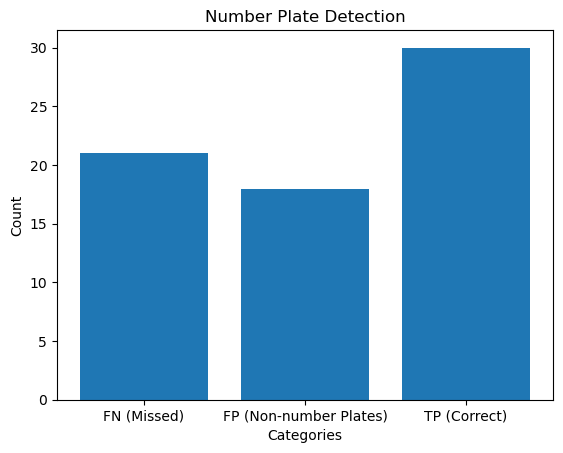

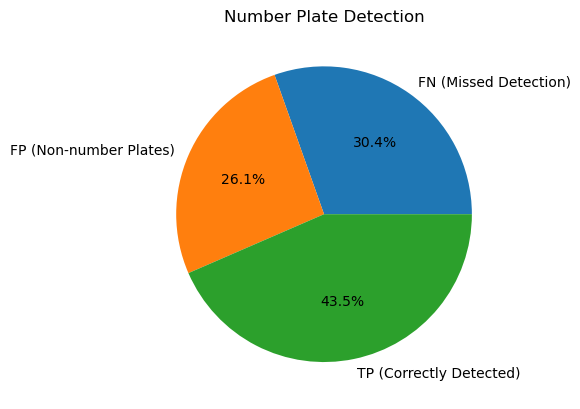

In [23]:
labels = ['FN (Missed)', 'FP (Non-number Plates)', 'TP (Correct)']
counts = [fn_count, fp_count, tp_count]

plt.bar(labels, counts)
plt.title('Number Plate Detection')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

labels = ['FN (Missed Detection)', 'FP (Non-number Plates)', 'TP (Correctly Detected)']
counts = [fn_count, fp_count, tp_count]

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Number Plate Detection')

plt.show()

Precision: TP / (TP + FP)

Precision is an indicator of a machine learning model's performance – the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions.

In [11]:
precision = tp_count / (tp_count + fp_count)
print(precision)

0.625


Recall (Sensitivity or True Positive Rate): TP / (TP + FN)

Recall attempts to answer the following question: What proportion of actual positives was identified correctly? A model that produces no false negatives has a recall of 1.0.

In [12]:
recall = tp_count / (tp_count + fn_count)
print(recall)

0.5882352941176471


F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

A machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset.

In [13]:
f1_score = 2 * (precision * recall) / (precision + recall)
print(f1_score)

0.6060606060606061


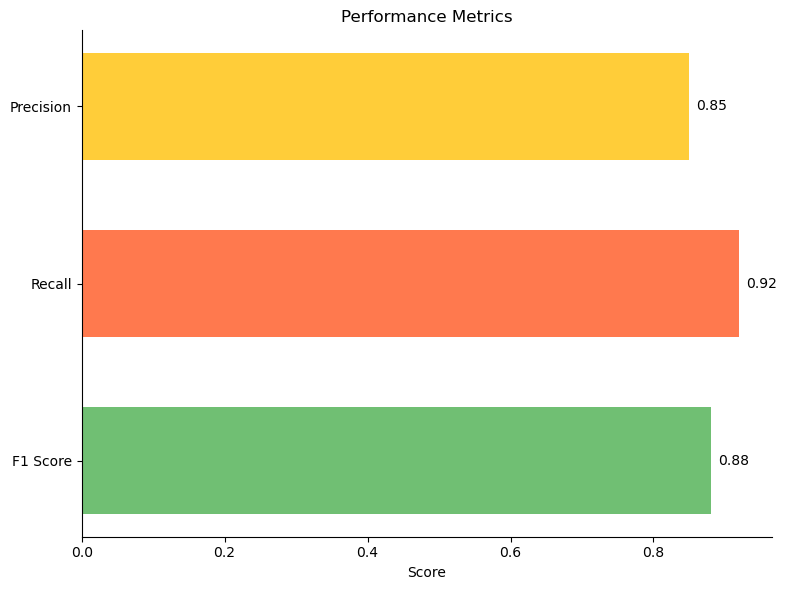

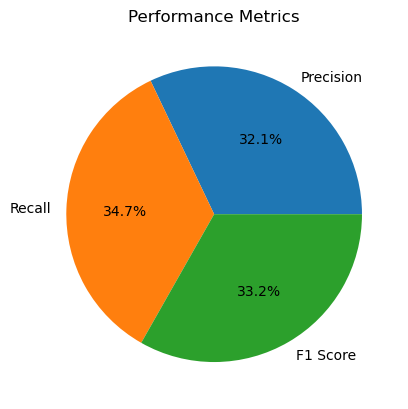

In [27]:
import matplotlib.pyplot as plt
import numpy as np

precision = 0.85
recall = 0.92
f1_score = 0.88

labels = ['Precision', 'Recall', 'F1 Score']

values = [precision, recall, f1_score]

colors = ['#FFC107', '#FF5722', '#4CAF50']

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.6
bar_positions = np.arange(len(labels))

bars = ax.barh(bar_positions, values, height=bar_width, color=colors, alpha=0.8)

ax.set_yticks(bar_positions)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Score')
ax.set_title('Performance Metrics')

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.01, bar.get_y() + bar_width / 2, f'{width:.2f}', va='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
-
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

precision = 0.85
recall = 0.92
f1_score = 0.88

labels = ['Precision', 'Recall', 'F1 Score']

values = [precision, recall, f1_score]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Performance Metrics')
plt.show()